# Mall Customers Segmentation - Age / Spending Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [43]:
data = pd.read_csv ('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0,0.5,'Spending Score(1-100)')

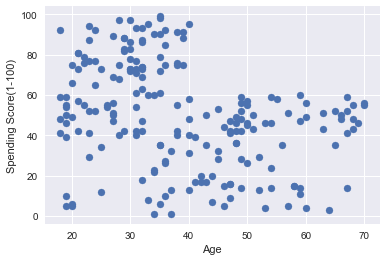

In [45]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')

In [5]:
data = data[['Age','Spending Score (1-100)']]

data.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [6]:
x = data.copy()

In [39]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

clusters.head()

,Age,Spending Score (1-100),cluster_pred
0,19,39,2
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,2


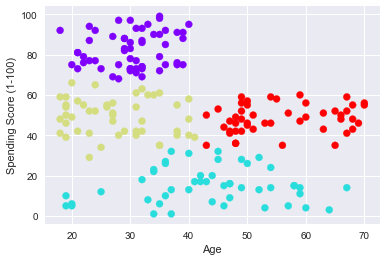

In [41]:
plt.scatter(clusters['Age'],clusters['Spending Score (1-100)'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.show()

In [42]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

In [18]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[399.99999999999994,
 189.3874903399243,
 124.32628617921529,
 89.76521676586151,
 71.09364141459412,
 53.128438356294,
 46.078929207548754,
 39.651008976832436,
 33.89482006782994]

Text(0,0.5,'WCSS')

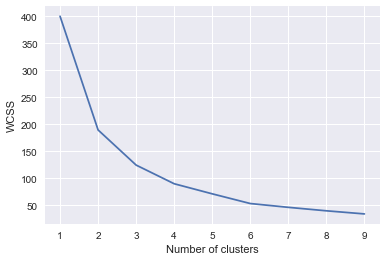

In [19]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')